<a href="https://colab.research.google.com/github/ReynadelYolo/ML_Projects/blob/main/Random_Forest_Intro_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
file_name = "/content/drive/MyDrive/MASTER BSBI/Intro/Telco-Customer-Churn-.csv"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data manipulation
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
#Load the dataset

df= pd.read_csv( "/content/drive/MyDrive/MASTER BSBI/Intro/Telco-Customer-Churn-.csv")

# Display the first five rows
df.head ()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Check 4 missing values

df.isnull().sum()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.drop("customerID", axis=1, inplace= True)

In [9]:
df[ "TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df [ "TotalCharges"].fillna (df [ "TotalCharges"].median(),inplace=True)

<ipython-input-9-2ed127871bfd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df [ "TotalCharges"].fillna (df [ "TotalCharges"].median(),inplace=True)


In [11]:
categorical_cols= df.select_dtypes(include= ["object" ]).columns

le= LabelEncoder()

for col in categorical_cols:
  df[col]= le.fit_transform(df[col])

In [12]:
scaler = StandardScaler()

numeric_cols = [ "tenure", "MonthlyCharges","TotalCharges"]

df [numeric_cols ]= scaler.fit_transform(df[numeric_cols])

In [14]:
x = df.drop ("Churn", axis=1)

y = df ["Churn"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
y_pred = rf_model.predict(x_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

print (f"Accuracy : {accuracy*100:.2f}%")

print ("Classification Report :/n", cr)


Accuracy : 79.70%
Classification Report :/n               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409



<Axes: >

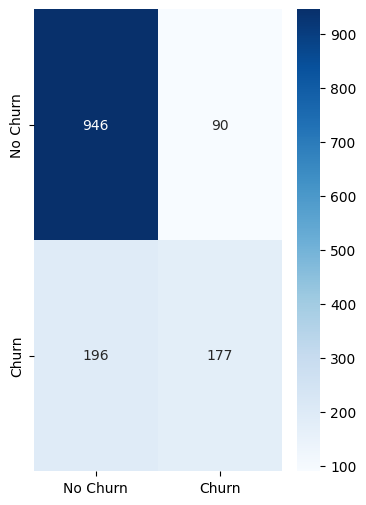

In [18]:
plt.figure(figsize=(4,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])

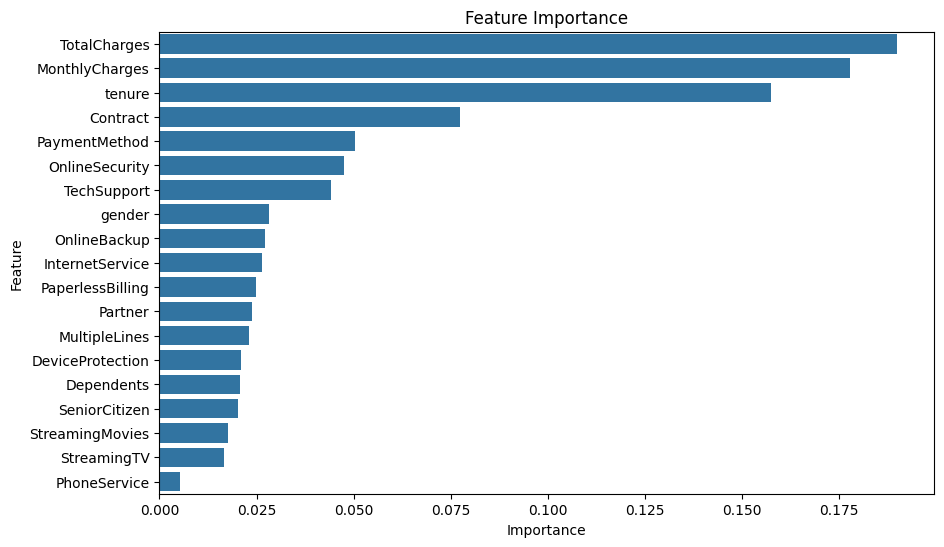

In [19]:
feature_importances = rf_model.feature_importances_

fi:df = pd.DataFrame({"Feature": x.columns, "Importance": feature_importances})

fi = fi.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=fi)
plt.title("Feature Importance")
plt.show()